Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


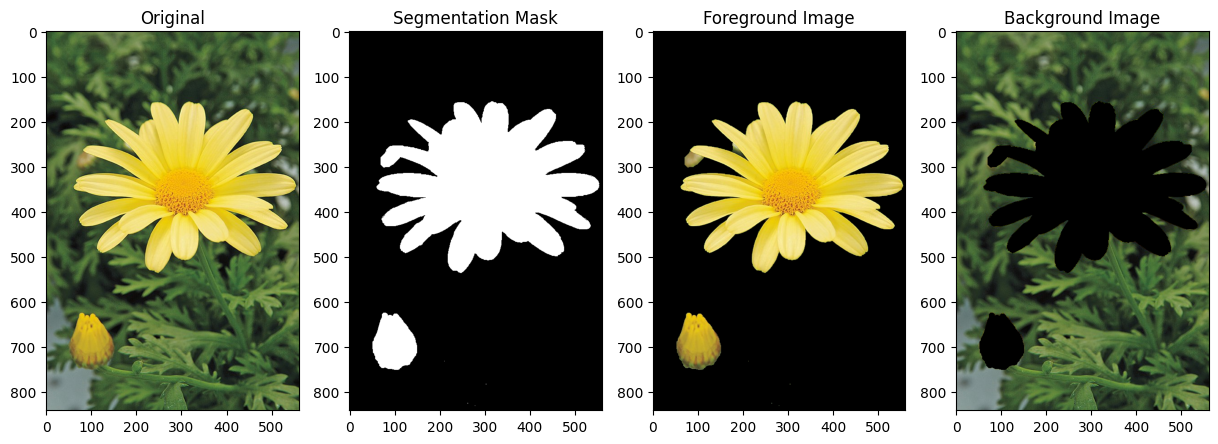

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

im_og = cv.imread('/content/drive/MyDrive/Image_Processing/daisy.jpg')
im_og = cv.cvtColor(im_og, cv.COLOR_BGR2RGB)

mask = np.zeros(im_og.shape[:2], np.uint8)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (50, 50, im_og.shape[1]-50, im_og.shape[0]-50)

cv.grabCut(im_og, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

im_1 = im_og * mask2[:, :, np.newaxis]
im_2 = im_og * (1- mask2[:, :,np.newaxis])

fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ax[0].imshow(im_og, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(mask2, cmap='gray')
ax[1].set_title('Segmentation Mask')

ax[2].imshow(im_1, cmap='gray')
ax[2].set_title('Foreground Image')

ax[3].imshow(im_2, cmap='gray')
ax[3].set_title('Background Image')


plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 3s 3s/step


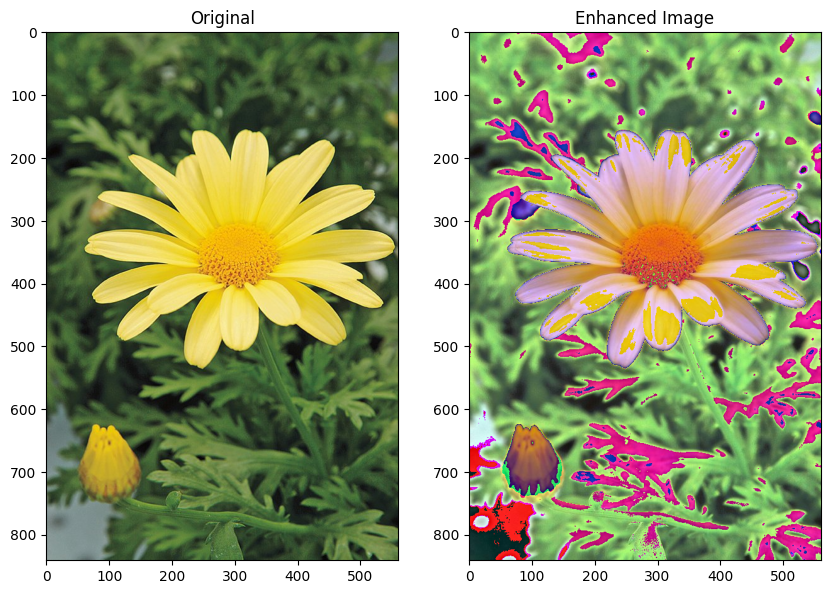

In [ ]:
import cv2 as cv
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

im_og = cv.imread('/content/drive/MyDrive/Image_Processing/daisy.jpg')
im_og = cv.cvtColor(im_og, cv.COLOR_BGR2RGB)

model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False)

def segment_image(im_og):
    input_size = (512, 512)
    resized_image = cv.resize(im_og, input_size)

    input_array = tf.keras.applications.densenet.preprocess_input(resized_image)

    predictions = model.predict(np.expand_dims(input_array, axis=0))
    mask = np.argmax(predictions.squeeze(), axis=-1)

    mask = cv.resize(mask.astype(np.uint8), (im_og.shape[1], im_og.shape[0]))

    return mask

def blur_background(im_og, mask, blur_factor=15):
    blurred_image = cv.GaussianBlur(im_og, (blur_factor, blur_factor), 0)

    fg_mask = cv.bitwise_not(mask)

    enhanced_image = cv.bitwise_and(blurred_image, blurred_image, mask=mask)
    enhanced_image += cv.bitwise_and(im_og, im_og, mask=fg_mask)

    return enhanced_image

segmentation_mask = segment_image(im_og)
im_e = blur_background(im_og, segmentation_mask)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(im_og, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(im_e, cmap= 'gray')
ax[1].set_title('Enhanced Image')

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


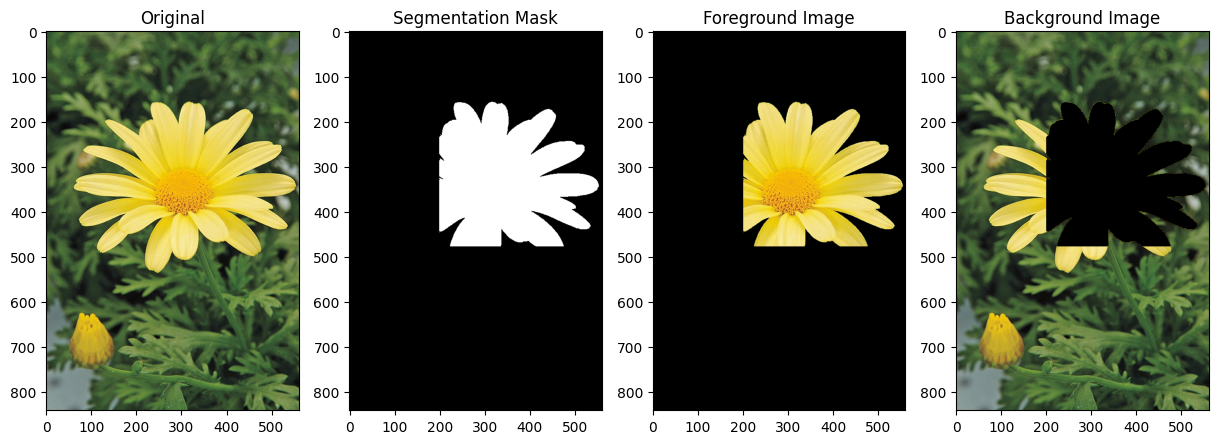

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

im_og = cv.imread('/content/drive/MyDrive/Image_Processing/daisy.jpg')
im_og = cv.cvtColor(im_og, cv.COLOR_BGR2RGB)

mask = np.zeros(im_og.shape[:2], np.uint8)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (200, 100, 400, 378)
cv.grabCut(im_og, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT) #foreground

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8') #mask

im_1 = im_og * mask2[:, :, np.newaxis]
im_2 = im_og * (1- mask2[:, :,np.newaxis])

fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ax[0].imshow(im_og, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(mask2, cmap='gray')
ax[1].set_title('Segmentation Mask')

ax[2].imshow(im_1, cmap='gray')
ax[2].set_title('Foreground Image')

ax[3].imshow(im_2, cmap='gray')
ax[3].set_title('Background Image')


plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


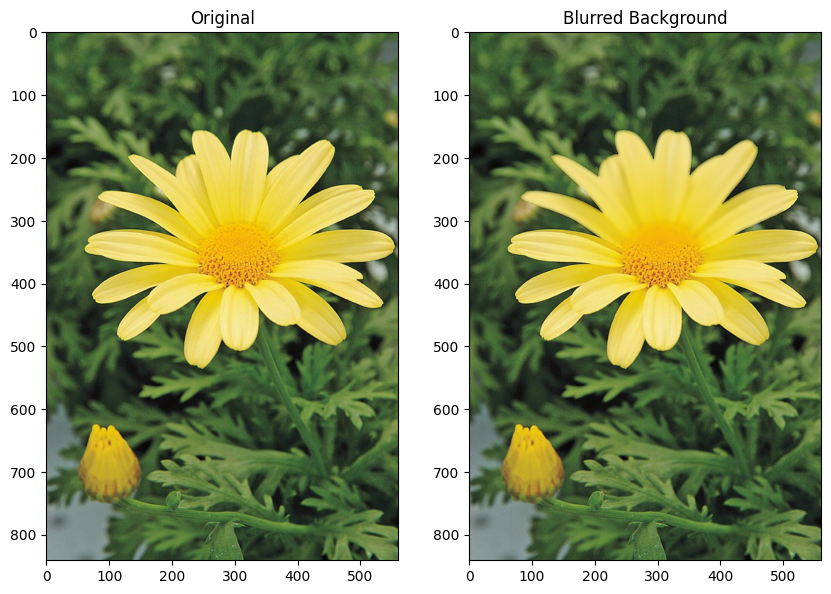

In [ ]:

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

im_og = cv.imread('/content/drive/MyDrive/Image_Processing/daisy.jpg')
im_og = cv.cvtColor(im_og, cv.COLOR_BGR2RGB)

mask = np.zeros(im_og.shape[:2], np.uint8)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)
rect = (50, 50, 450, 290)
cv.grabCut(im_og, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

blurred_image = cv.GaussianBlur(im_og, (15, 15), 0)
result_image = im_og * (1 - mask2[:, :, np.newaxis]) + blurred_image * mask2[:, :, np.newaxis]

fig, ax = plt.subplots(1, 2, figsize=(10,10))

ax[0].imshow(im_og, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(result_image, cmap='gray')
ax[1].set_title('Blurred Background')

plt.show()





